# **Project Name**    - **Predicting Fraud With Tensorflow**


##### **Project Type**    - Deep Learning
##### **Contribution**    - Individual
##### **Name -** Siddharth Ray


# **Problem Statement and Project Background**

**A)** The use of credit cards is increasing nowadays and with that, the fraud associated with credit card transactions is also on the rise. Australians lost almost half a billion dollars in credit card fraud in a single year. It is therefore important that the institutions offering the credit card be able to recognize fraudulent credit card transactions. With the availability of huge amounts of data and exponential growth in computing power, techniques like Deep Learning to learn the patterns from data can be used to build a solution to identify fraudulent transactions.

**B)** Any deep learning model requires huge data and the data used in this project entry is from Kaggle.

**C)** The dataset consists of credit card transactions in September 2013 by European cardholders. This dataset contains transactions carried over 2 days and out of 284807 total transactions, 492 are marked as fraudulent. As is clear from these statistics the dataset is highly unbalanced: positive class (fraudulent) is only 0.172 %. Although this aspect of the data distribution in this case has already been mentioned by the publisher, as an AI developer, embarking on modelling a problem like this (classification), studying the data distribution is one of the key exercises to understand your data. The dataset has been anonymised and many attributes (features) have been removed. Features (attributes) have been labelled as V1, V2,..and only numerical data is included (neural nets work on numbers !). When faced with a dataset and a dataset having lots of attributes/features, one of the important data preparation steps is to keep only those features which can influence the model. Deciding on which features to keep has evolved into its area of study called ‘feature engineering’. One of the techniques to find out which features are important is called PCA — Principal Component Analysis. From the description of the dataset, it is clear that PCA has already been done, so we need not worry about that! The only features not transformed with PCA are ‘Time’ and ‘Amount’. ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# **GitHub Link -**

Github Link:- https://github.com/Siddharth-94/Predicting-Fraud-With-Tensorflow.git

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.15.0


### Dataset Loading

In [ ]:
# Load Dataset

# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

## Exploring the Data

### Dataset First View

In [ ]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
# First Look

# Checking the first 5 rows of data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking the bottom 5 rows of the data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**The data is mostly transformed from its original form, for confidentiality reasons.**

In [ ]:
# Dataset Describe
# Checking statistical data on numerical columns.
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Dataset Rows & Columns count

In [ ]:
data.shape

(284807, 31)

#### Missing Values/Null Values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**As no null values are present, we can go ahead and check other informations of the data.**

### Dataset Information

In [ ]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**We see that values are either int or float. The dataset has 2 classes 0 and 1 and we can get the value counts for each.**

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**The data with class label 0 has much higher count that the data for the class label 1. Hence, it is highly unbalanced dataset. Before we consume this dataset for the further analysis, we need to balance the dataset.**

## ***EDA (Exploratory Data Analysis)***

Let's see how time compares across fraudulent and normal transactions.

In [ ]:
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


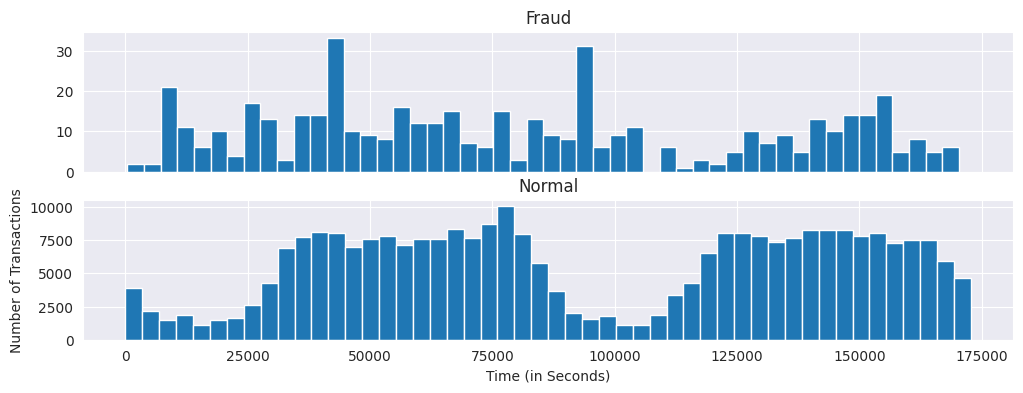

In [ ]:
# Visualization Code
sns.set_style('darkgrid')
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

**The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.**

**Now let's see if the transaction amount differs between the two types.**

In [ ]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


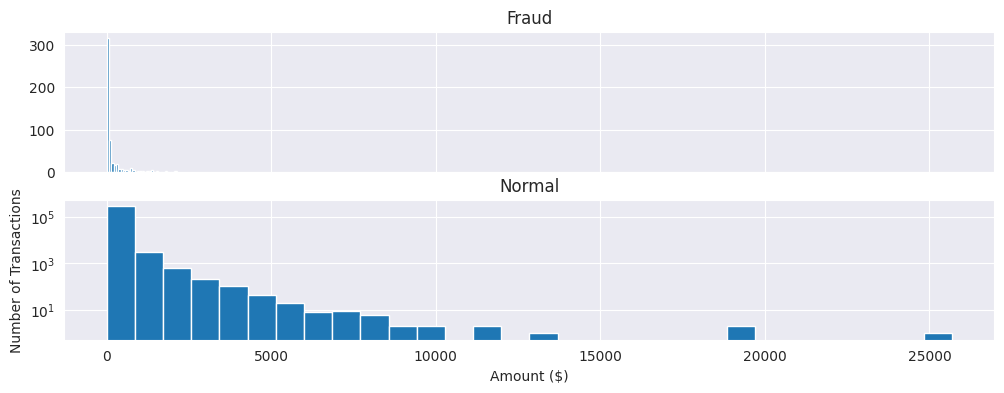

In [ ]:
# Visualization Code
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

**The majority of transactions involve small amounts, typically less than 100 Dollars. In contrast, fraudulent transactions exhibit a significantly lower maximum value compared to normal transactions, with 2,125.87 Dollars versus 25,691.16 Dollars.**

**Now, let's examine the relationship between Time and Amount to discover any potential insights.**

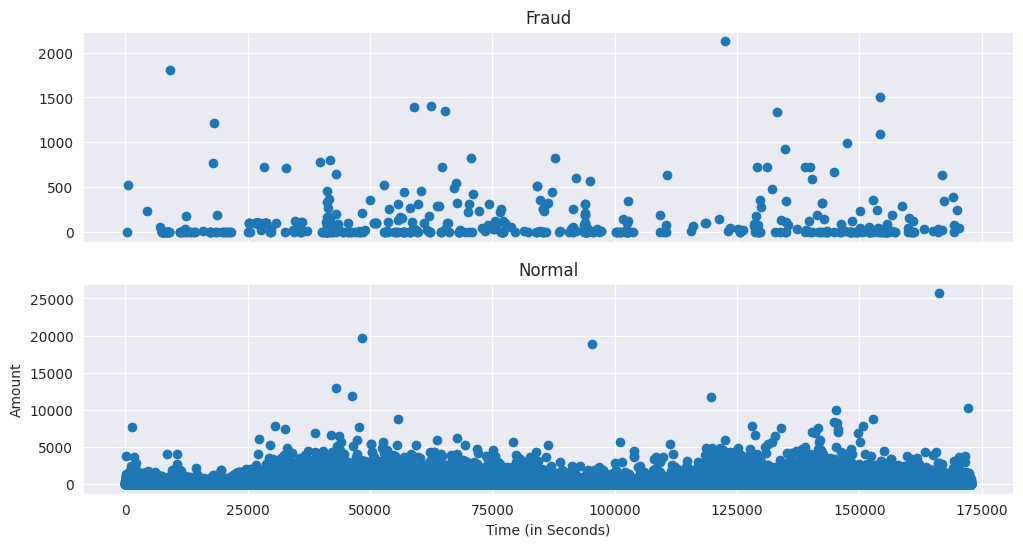

In [ ]:
# Create subplots with 2 rows, 1 column, sharing the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

# Scatter plot for Fraudulent transactions (Class 1)
ax1.scatter(data.Time[data.Class == 1], data.Amount[data.Class == 1])
ax1.set_title('Fraud')

# Scatter plot for Normal transactions (Class 0)
ax2.scatter(data.Time[data.Class == 0], data.Amount[data.Class == 0])
ax2.set_title('Normal')

# Set common labels
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

# Display the plot
plt.show()

Nothing too useful here.

Next, let's take a look at the anonymized features.

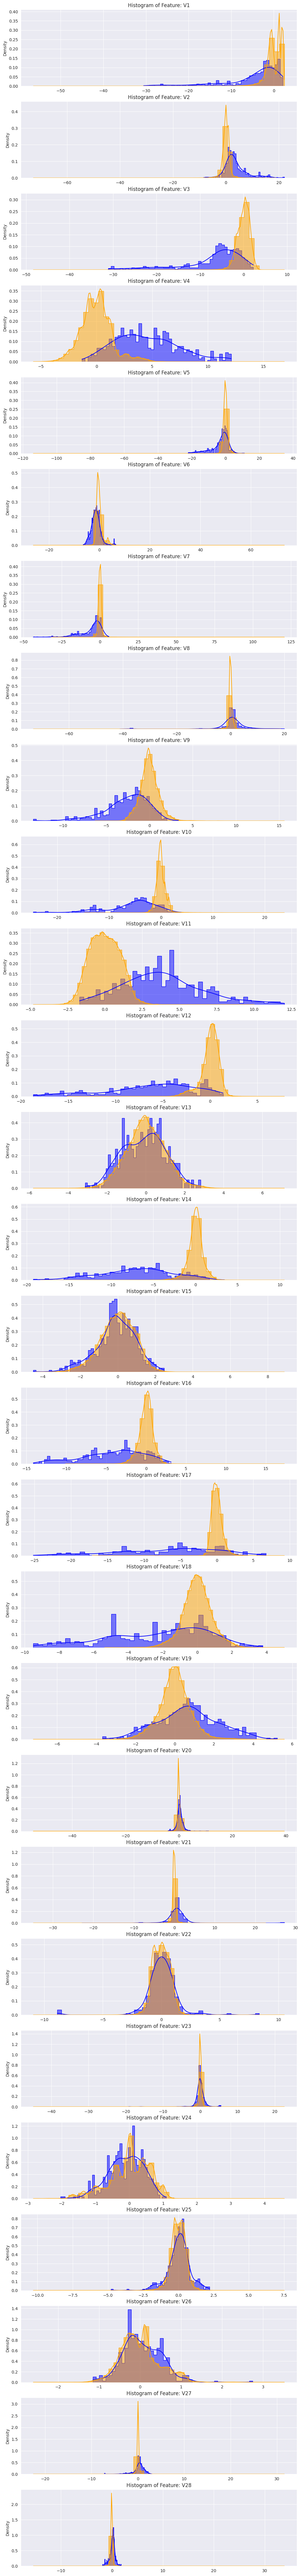

In [ ]:
# Select only the anonymized features
v_features = data.iloc[:,1:29].columns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)

# Iterate over each anonymized feature
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])

    # Plot histograms and KDE plots for fraudulent transactions (Class 1) and normal transactions (Class 0)
    sns.histplot(data[cn][data.Class == 1], bins=50, kde=True, element='step', stat='density', common_norm=False, color='blue', label='Class 1')
    sns.histplot(data[cn][data.Class == 0], bins=50, kde=True, element='step', stat='density', common_norm=False, color='orange', label='Class 0')

    ax.set_xlabel('')
    ax.set_title('Histogram of Feature: ' + str(cn))

plt.show()



###**Balance the dataset**

#####Let us create a variable non_fraud which will contain the data of all the genuine transactions i.e. the transactions with [‘class’]==0 and another variable fraud which will contain the data of all the fraudulent transactions i.e. transactions with [‘class’]==1.

In [ ]:
# Creating New DataFrames
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

Let us check the shape

In [ ]:
# Finding the shape of new DataFrames
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

The shape for each variable tells us that non_fraud has **284315** rows and **31** columns and fraud has **492** rows and **31** columns.

To balance the dataset, we will select **492** transactions randomly from non_fraud so that non_fraud has the same size as fraud.

In [ ]:
non_fraud = non_fraud.sample(fraud.shape[0])

Now the shape is

In [ ]:
non_fraud.shape

(492, 31)

We will append both the datasets i.e. fraud and non-fraud to create a final balanced dataset.

In [ ]:
data = pd.concat([fraud,non_fraud], axis = 0, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,131922.0,2.030097,0.374575,-2.371247,0.780993,0.796947,-0.865259,0.247677,-0.265192,0.556488,-1.107064,-0.200499,0.388118,0.839135,-2.864033,-0.408391,0.292744,1.963944,0.480930,-0.292858,-0.046889,-0.012039,0.312222,-0.034116,0.492705,0.260395,0.699397,-0.032320,-0.003897,12.31,0
980,132910.0,2.071034,-0.020669,-1.824184,0.323379,0.557934,-0.807963,0.493799,-0.372806,0.288465,0.070691,-0.872131,0.581758,0.478607,0.287133,-0.405929,-0.587412,-0.117097,-0.924736,0.178395,-0.143884,-0.028113,0.096936,0.084135,0.679390,0.213211,0.534153,-0.097824,-0.067769,19.90,0
981,121522.0,1.878979,-1.217169,-1.639267,-0.887792,-0.366040,-0.709471,-0.050754,-0.361780,-0.609896,0.690470,-0.759267,-0.221529,0.931374,-0.130075,0.082615,0.989383,0.075905,-1.751334,0.811576,0.425656,0.037658,-0.351184,0.120269,0.482956,-0.196914,-0.466271,-0.070382,-0.018032,201.96,0
982,77311.0,1.303801,-0.667478,0.046049,-0.723243,-0.899506,-0.643973,-0.430443,-0.082044,-1.042146,0.874791,0.751810,-0.066683,-0.621687,0.518239,0.271977,-0.992095,-0.331836,1.591579,-0.353608,-0.428194,-0.341885,-0.669855,-0.034264,0.010596,0.243074,1.042050,-0.083585,-0.003490,49.90,0


In [ ]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

We will now separate features from class. X will contain features space and y will contain the class label.

In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']

###**Train and test split**
#####Next, we will split the data into training and testing set with the help of train_test_split(). test_size=0.2 will keep 20% data for testing and 80% data will be used for training the model. ‘random_state’ controls the shuffling applied to the data before applying the split. ‘stratify=y’ means that the data is split in a stratified fashion, using y as the class labels.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

Shape is

In [ ]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

###**Scaling the data**
#####We will now scale the data in the train and test datasets. This means that we will bring the data into the same range. StandardScaler standardizes the features by removing the mean and scaling to unit variance. We will fit scaler only to the training dataset but we will transform both the training as well as the testing dataset.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

The data is 2 dimensional where as the neural network accepts 3 dimensional data. So, we need to reshape the data into 3 dimensional.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Shape is

In [ ]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## ***DL Model Implementation***

###**Build the CNN Model**
We will use sequential API to build the model where each layer has one input and one output tensor.

**1.** **Conv1D()** is a 1D Convolution Layer, this layer is very effective for deriving features from a fixed-length segment of the overall dataset, where it is not so important where the feature is located in the segment. In the first Conv1D() layer we are learning a total of 32 filters with size of convolutional window as 2. The input_shape specifies the shape of the input. It is a necessary parameter for the first layer in any neural network. We will be using ReLu activation function. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

**2.** **BatchNormalization()** allows each layer of a network to learn by itself a little bit more independently of other layers. To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation. It applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

**3.** **Dropout()** is used to randomly set the outgoing edges of hidden units to 0 at each update of the training phase. The value passed in dropout specifies the probability at which outputs of the layer are dropped out.

**4.** **Flatten()** is used to convert the data into a 1-dimensional array for inputting it to the next layer.

**5.** **Dense()** is the regular deeply connected neural network layer. The output layer is also a dense layer with 1 neuron because we are predicting a single value as this is a binary classification problem. Sigmoid function is used because it exists between (0 to 1) and this facilitates us to predict a binary input.

In [ ]:
epochs = 20
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

###**Compile and fit the model**
#####We will compile and fit the model. We are using Adam optimizer wit 0.00001 learning rate. We will use 20 epoch to train the model. An epoch is an iteration over the entire data provided. validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch. As metrics=[‘accuracy’], the model will be evaluated based on the accuracy.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 28ms/step - loss: 0.9199 - accuracy: 0.6036 - val_loss: 0.6182 - val_accuracy: 0.8731
Epoch 2/20
25/25 [==============================] - 0s 17ms/step - loss: 0.4890 - accuracy: 0.8145 - val_loss: 0.5664 - val_accuracy: 0.8832
Epoch 3/20
25/25 [==============================] - 0s 18ms/step - loss: 0.4110 - accuracy: 0.8501 - val_loss: 0.5249 - val_accuracy: 0.9086
Epoch 4/20
25/25 [==============================] - 0s 17ms/step - loss: 0.3687 - accuracy: 0.8501 - val_loss: 0.4834 - val_accuracy: 0.9239
Epoch 5/20
25/25 [==============================] - 0s 17ms/step - loss: 0.3199 - accuracy: 0.8767 - val_loss: 0.4471 - val_accuracy: 0.9289
Epoch 6/20
25/25 [==============================] - 0s 18ms/step - loss: 0.3242 - accuracy: 0.8729 - val_loss: 0.4081 - val_accuracy: 0.9340
Epoch 7/20
25/25 [==============================] - 0s 19ms/step - loss: 0.3022 - accuracy: 0.8882 - val_loss: 0.3737 - val_accuracy: 0.9289
Epoch 8/20
25

###**Visualize the results**
#####Let us define a function which will plot the curves given that history and epoch is passed.

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

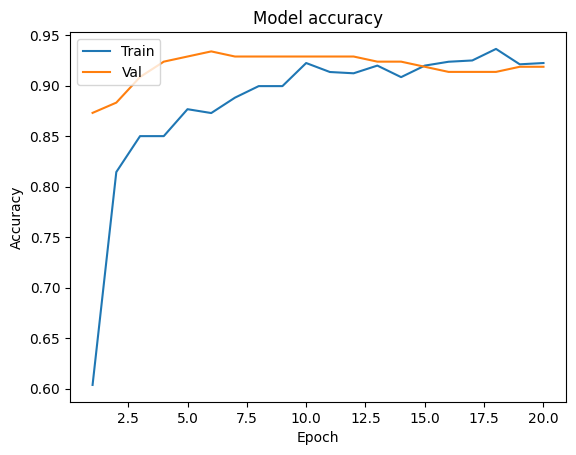

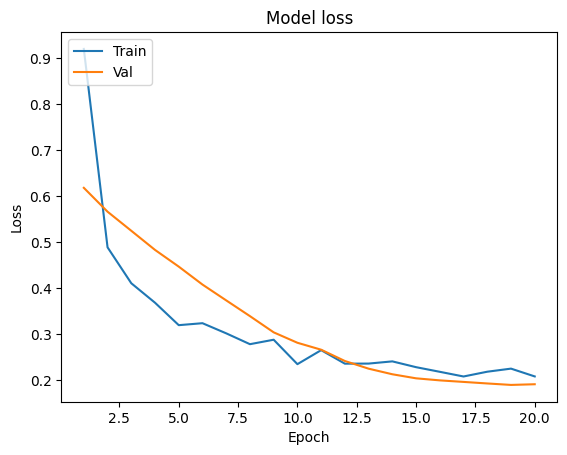

In [ ]:
# Visualizing the graph
plot_learningCurve(history, epochs)

We can see that the training accuracy is higher than the validation accuracy. So we can say that the model is overfitting. To improve the accuracy, let us add a MaxPool layer and also increase the number of epochs.

**MaxPooling:** It's a type of pooling operation that involves taking the maximum value from a group of neighboring elements. Max pooling is used to capture the most important features and reduce the spatial dimensions of the input.

**1D:** Indicates that the pooling operation is applied along one dimension. In the case of MaxPool1D(2), it's applied along the time dimension or sequence dimension if you are dealing with sequential data.

**(2):** Represents the pool size. In this case, the pool size is 2, meaning that the operation considers groups of 2 adjacent elements and selects the maximum value from each group.

For example, if you have a 1D input sequence **[a, b, c, d, e, f, g, h]**, applying MaxPool1D(2) would result in the output sequence **[max(a, b), max(c, d), max(e, f), max(g, h)]**. It effectively reduces the length of the sequence by half.

**Adding a MaxPool layer in a neural network can help in reducing overfitting and improving computational efficiency by reducing the spatial dimensions of the feature maps. It also helps in capturing the most important information from the input.**

In [ ]:
epochs = 50
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 2s 23ms/step - loss: 1.2668 - accuracy: 0.5769 - val_loss: 0.6549 - val_accuracy: 0.7766
Epoch 2/50
25/25 [==============================] - 0s 13ms/step - loss: 0.8995 - accuracy: 0.6468 - val_loss: 0.6242 - val_accuracy: 0.7766
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.8235 - accuracy: 0.7027 - val_loss: 0.5944 - val_accuracy: 0.7360
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 0.6685 - accuracy: 0.7319 - val_loss: 0.5694 - val_accuracy: 0.7157
Epoch 5/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6757 - accuracy: 0.7319 - val_loss: 0.5450 - val_accuracy: 0.7157
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6049 - accuracy: 0.7586 - val_loss: 0.5225 - val_accuracy: 0.7107
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.5629 - accuracy: 0.7751 - val_loss: 0.5015 - val_accuracy: 0.7208
Epoch 8/50
25

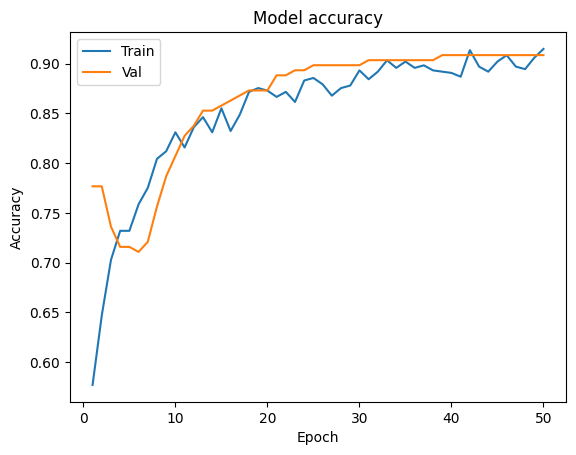

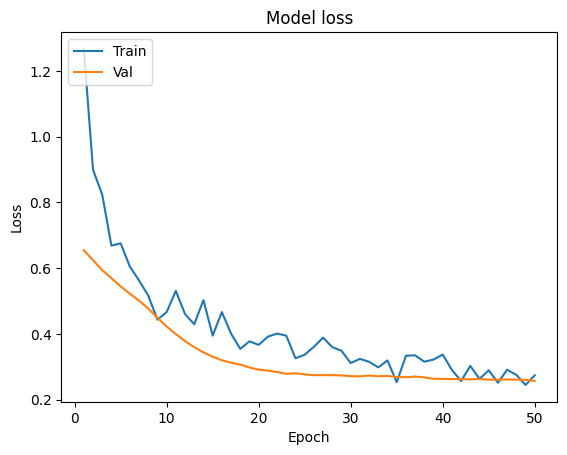

In [ ]:
# Visualizing the graph
plot_learningCurve(history, epochs)

We can clearly see that we have got a better result after re-training our model with a few changes.

###**Evaluate the model**

In [ ]:
# Printing the Accuracy
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.909


###**Predict the model**

In [ ]:
# Making Prediction
val = X_train[0]
yhat = model.predict(asarray([val]))
print('Predicted: class=%d' % argmax(yhat))

1/1 [==============================] - 0s 184ms/step
Predicted: class=0


### **Our model made the correct prediction!**

### ***Hurrah! You have successfully completed your Deep Learning Capstone Project !!!***